# PART OF THE TEMPLATE

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from dpp.data import load_from_kaggle

c:\Users\Eyyub\Desktop\StackFuel\PortfolioProjekt\DPP-Stackfuel-Data-Science-Projekt\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
# Use only the Kaggle dataset handle, not the full URL or query string
dataset_link = "alexteboul/diabetes-health-indicators-dataset"  # correct Kaggle dataset handle
destination = "../data/raw"
dataset_name = dataset_link.split("/")[-1]

files = load_from_kaggle(
    dataset_link=dataset_link, 
    destination=destination,
)

Destination directory '../data/raw\diabetes-health-indicators-dataset' already exists with files. Skipping download (replace=False).


In [5]:
files

['diabetes_012_health_indicators_BRFSS2015.csv',
 'diabetes_binary_5050split_health_indicators_BRFSS2015.csv',
 'diabetes_binary_health_indicators_BRFSS2015.csv']

In [6]:
df = pd.read_csv(f"{destination}/{dataset_name}/{files[2]}", delimiter=",")
df.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [7]:
display(
    "Shape",
    df.shape,
    "Description",
    df.describe().round(2),
    "Duplicates",
    df.duplicated().sum(),
)


pd.DataFrame(
    {
        "Data Types": df.dtypes,
        "Missing Values": df.isnull().sum(),
        "Unique Values": df.nunique(),
        "Sample Values": [df[col].sample(3).tolist() for col in df.columns]
    })


'Shape'

(253680, 22)

'Description'

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.00,253680.00,253680.00,253680.00,253680.00,253680.00,253680.00,253680.00,253680.00,253680.00,...,253680.00,253680.00,253680.00,253680.00,253680.00,253680.00,253680.00,253680.00,253680.00,253680.00
mean,0.14,0.43,0.42,0.96,28.38,0.44,0.04,0.09,0.76,0.63,...,0.95,0.08,2.51,3.18,4.24,0.17,0.44,8.03,5.05,6.05
std,0.35,0.49,0.49,0.19,6.61,0.50,0.20,0.29,0.43,0.48,...,0.22,0.28,1.07,7.41,8.72,0.37,0.50,3.05,0.99,2.07
min,0.00,0.00,0.00,0.00,12.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00
25%,0.00,0.00,0.00,1.00,24.00,0.00,0.00,0.00,1.00,0.00,...,1.00,0.00,2.00,0.00,0.00,0.00,0.00,6.00,4.00,5.00
50%,0.00,0.00,0.00,1.00,27.00,0.00,0.00,0.00,1.00,1.00,...,1.00,0.00,2.00,0.00,0.00,0.00,0.00,8.00,5.00,7.00
75%,0.00,1.00,1.00,1.00,31.00,1.00,0.00,0.00,1.00,1.00,...,1.00,0.00,3.00,2.00,3.00,0.00,1.00,10.00,6.00,8.00
max,1.00,1.00,1.00,1.00,98.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,5.00,30.00,30.00,1.00,1.00,13.00,6.00,8.00


'Duplicates'

np.int64(24206)

,Data Types,Missing Values,Unique Values,Sample Values
Diabetes_binary,float64,0,2,"[1.0, 0.0, 1.0]"
HighBP,float64,0,2,"[1.0, 0.0, 1.0]"
HighChol,float64,0,2,"[0.0, 0.0, 0.0]"
CholCheck,float64,0,2,"[1.0, 1.0, 1.0]"
BMI,float64,0,84,"[29.0, 29.0, 40.0]"
Smoker,float64,0,2,"[0.0, 1.0, 1.0]"
Stroke,float64,0,2,"[0.0, 0.0, 0.0]"
HeartDiseaseorAttack,float64,0,2,"[1.0, 0.0, 0.0]"
PhysActivity,float64,0,2,"[1.0, 1.0, 1.0]"
Fruits,float64,0,2,"[1.0, 1.0, 0.0]"


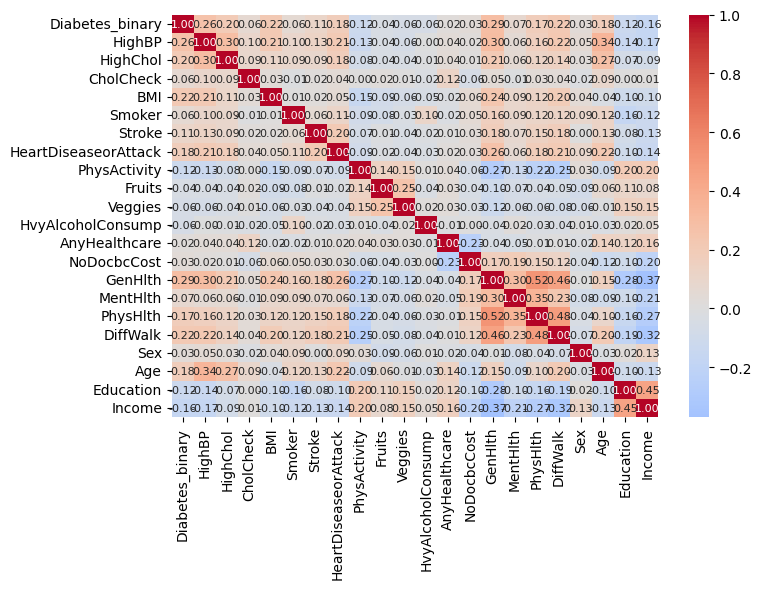

In [8]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", center=0,
            annot_kws={"size": 8}, fmt='.2f')  # Kleinere Schrift + 2 Dezimalstellen
plt.tight_layout()
plt.show()

# ===========================================

# ===========================================

#  OWN PART BEGINS HERE

# Exploration of Data

## Imports

In [40]:
# =============================================================================
# DIABETES RISK PREDICTION - EXPLORATORY DATA ANALYSIS (BINARY) - COLORBLIND SAFE
# Dataset: BRFSS 2015 CDC - Diabetes Health Indicators (Binary)
# Author: Eyyub Öztürk
# Date: 2025
# =============================================================================

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.ensemble import IsolationForest
import warnings
warnings.filterwarnings('ignore')

# --------------------------- Colorblind-safe palette --------------------------
CB_BLUE   = "#0072B2"
CB_ORANGE = "#E69F00"
CB_SKY    = "#56B4E9"
CB_GREEN  = "#009E73"
CB_YELLOW = "#F0E442"
CB_RED    = "#D55E00"
CB_PURPLE = "#CC79A7"
CB_BLACK  = "#000000"

COLOR_CLASS_0 = CB_BLUE
COLOR_CLASS_1 = CB_ORANGE

HIST_COLOR        = CB_SKY
BOX_COLOR         = CB_SKY
VIOLIN_COLORS     = [COLOR_CLASS_0, COLOR_CLASS_1]
BAR_COLOR_GENERIC = CB_GREEN
HEATMAP_CMAP      = "viridis"

plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette([CB_BLUE, CB_ORANGE, CB_SKY, CB_GREEN, CB_YELLOW, CB_RED, CB_PURPLE, CB_BLACK])
sns.set_context("talk", font_scale=0.9)

# ======================== VARIABLE DEFINITIONS (BRFSS 2015) ==================

# Age (_AGEG5YR): 13-level age category
AGE_CODE_TO_LABEL = {
    1: '18-24', 2: '25-29', 3: '30-34', 4: '35-39', 5: '40-44',
    6: '45-49', 7: '50-54', 8: '55-59', 9: '60-64',
    10: '65-69', 11: '70-74', 12: '75-79', 13: '80+'
}
AGE_ORDER = list(AGE_CODE_TO_LABEL.values())

# Education: Highest grade or year of school completed
EDUCATION_CODE_TO_LABEL = {
    1: 'Never attended/Kindergarten only',
    2: 'Grades 1-8 (Elementary)',
    3: 'Grades 9-11 (Some high school)',
    4: 'Grade 12 or GED (High school graduate)',
    5: 'College 1-3 years (Some college/technical school)',
    6: 'College 4+ years (College graduate)'
}
EDUCATION_ORDER = list(EDUCATION_CODE_TO_LABEL.values())

# Income: Annual household income categories
INCOME_CODE_TO_LABEL = {
    1: 'Less than $10,000',
    2: '$10,000 to < $15,000',
    3: '$15,000 to < $20,000',
    4: '$20,000 to < $25,000',
    5: '$25,000 to < $35,000',
    6: '$35,000 to < $50,000',
    7: '$50,000 to < $75,000',
    8: '$75,000 or more'
}
INCOME_ORDER = list(INCOME_CODE_TO_LABEL.values())

# GenHlth: General Health (1-5 scale)
GENHLTH_CODE_TO_LABEL = {
    1: 'Excellent',
    2: 'Very good',
    3: 'Good',
    4: 'Fair',
    5: 'Poor'
}
GENHLTH_ORDER = list(GENHLTH_CODE_TO_LABEL.values())

# Sex: Biological sex
SEX_CODE_TO_LABEL = {
    0: 'Female',
    1: 'Male'
}

# Binary variables (0 = No, 1 = Yes)
BINARY_CODE_TO_LABEL = {
    0: 'No',
    1: 'Yes'
}

# Diabetes_binary: Target variable
DIABETES_CODE_TO_LABEL = {
    0: 'No Diabetes',
    1: 'Prediabetes/Diabetes'
}

print("="*80)
print("DIABETES RISK PREDICTION - EXPLORATORY DATA ANALYSIS (BINARY)")
print("Dataset: BRFSS 2015 CDC - Diabetes Health Indicators (Binary)")
print("="*80)


DIABETES RISK PREDICTION - EXPLORATORY DATA ANALYSIS (BINARY)
Dataset: BRFSS 2015 CDC - Diabetes Health Indicators (Binary)


## Load Data & Initial Inspection

In [42]:
# =============================================================================
# 1. DATA LOADING
# =============================================================================
print("\n" + "="*80)
print("DATA LOADING")
print("="*80)

df = pd.read_csv(f"{destination}/{dataset_name}/{files[2]}", delimiter=",")

print(f"\nDataset shape: {df.shape}")
print(f"Number of records: {df.shape[0]:,}")
print(f"Number of features: {df.shape[1]}")

print("\nColumn names:")
print(df.columns.tolist())

print("\nFirst few rows:")
print(df.head())

print("\nBasic info:")
print(df.info())


DATA LOADING

Dataset shape: (253680, 22)
Number of records: 253,680
Number of features: 22

Column names:
['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income']

First few rows:
   Diabetes_binary  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0              0.0     1.0       1.0        1.0  40.0     1.0     0.0   
1              0.0     0.0       0.0        0.0  25.0     1.0     0.0   
2              0.0     1.0       1.0        1.0  28.0     0.0     0.0   
3              0.0     1.0       0.0        1.0  27.0     0.0     0.0   
4              0.0     1.0       1.0        1.0  24.0     0.0     0.0   

   HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
0                   0.0           0.0     0.0  ...            1.0   
1                 

## Column Validation

In [ ]:
# =============================================================================
# 2. EARLY COLUMN VALIDATION
# =============================================================================
print("\n" + "="*80)
print("EARLY COLUMN VALIDATION")
print("="*80)

print("\nColumn Names and Data Types:")
print("-"*80)
for idx, (col, dtype) in enumerate(zip(df.columns, df.dtypes), 1):
    print(f"{idx:2}. {col:35} | {str(dtype):15}")

print("\n" + "-"*80)
print("Statistical Summary (numeric):")
print("-"*80)
print(df.describe())


DATASET OVERVIEW

Column Names and Data Types:
--------------------------------------------------------------------------------
 1. Diabetes_binary                     | float64        
 2. HighBP                              | float64        
 3. HighChol                            | float64        
 4. CholCheck                           | float64        
 5. BMI                                 | float64        
 6. Smoker                              | float64        
 7. Stroke                              | float64        
 8. HeartDiseaseorAttack                | float64        
 9. PhysActivity                        | float64        
10. Fruits                              | float64        
11. Veggies                             | float64        
12. HvyAlcoholConsump                   | float64        
13. AnyHealthcare                       | float64        
14. NoDocbcCost                         | float64        
15. GenHlth                             | float64        
1

## Data Types

In [44]:
# =============================================================================
# 3. DATA TYPE CORRECTIONS
# =============================================================================

print("\n" + "="*80)
print("DATA TYPE CORRECTIONS")
print("="*80)

# Convert appropriate columns to categorical
categorical_cols = [
    'Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'Smoker',
    'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
    'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
    'DiffWalk', 'Sex', 'Age', 'Education', 'Income'
]

for col in categorical_cols:
    df[col] = df[col].astype('category')

print("Data types after conversion:")
print(df.dtypes)


DATA TYPE CORRECTIONS
Data types after conversion:
Diabetes_binary         category
HighBP                  category
HighChol                category
CholCheck               category
BMI                      float64
Smoker                  category
Stroke                  category
HeartDiseaseorAttack    category
PhysActivity            category
Fruits                  category
Veggies                 category
HvyAlcoholConsump       category
AnyHealthcare           category
NoDocbcCost             category
GenHlth                 category
MentHlth                 float64
PhysHlth                 float64
DiffWalk                category
Sex                     category
Age                     category
Education               category
Income                  category
dtype: object


## Feature Categorization

In [45]:
# ============================================================================
# 4. FEATURE CATEGORIZATION
# ============================================================================
print("\n" + "="*80)
print("FEATURE CATEGORIZATION")
print("="*80)

# Define variable explanations
VARIABLE_EXPLANATIONS = {
    'Diabetes_binary': '0 = no diabetes, 1 = prediabetes or diabetes',
    'HighBP': '0 = no high blood pressure, 1 = high blood pressure',
    'HighChol': '0 = no high cholesterol, 1 = high cholesterol',
    'CholCheck': '0 = no cholesterol check in 5 years, 1 = yes cholesterol check in 5 years',
    'BMI': 'Body Mass Index (continuous)',
    'Smoker': '0 = no (smoked < 100 cigarettes in lifetime), 1 = yes (smoked >= 100 cigarettes in lifetime)',
    'Stroke': '0 = no stroke history, 1 = yes stroke history',
    'HeartDiseaseorAttack': '0 = no coronary heart disease (CHD) or myocardial infarction (MI), 1 = yes CHD or MI',
    'PhysActivity': '0 = no physical activity in past 30 days, 1 = yes physical activity in past 30 days',
    'Fruits': '0 = no fruit consumption (< 1 per day), 1 = yes fruit consumption (>= 1 per day)',
    'Veggies': '0 = no vegetable consumption (< 1 per day), 1 = yes vegetable consumption (>= 1 per day)',
    'HvyAlcoholConsump': '0 = no heavy drinking, 1 = yes heavy drinking (adult men: >14 drinks/week, adult women: >7 drinks/week)',
    'AnyHealthcare': '0 = no health coverage, 1 = yes health coverage',
    'NoDocbcCost': '0 = no (could see doctor when needed), 1 = yes (could not see doctor due to cost in past 12 months)',
    'GenHlth': '1 = excellent, 2 = very good, 3 = good, 4 = fair, 5 = poor',
    'MentHlth': 'Number of days mental health was not good in past 30 days (0-30)',
    'PhysHlth': 'Number of days physical health was not good in past 30 days (0-30)',
    'DiffWalk': '0 = no difficulty walking, 1 = yes difficulty walking or climbing stairs',
    'Sex': '0 = female, 1 = male',
    'Age': '1 = 18-24, 2 = 25-29, 3 = 30-34, 4 = 35-39, 5 = 40-44, 6 = 45-49, 7 = 50-54, 8 = 55-59, 9 = 60-64, 10 = 65-69, 11 = 70-74, 12 = 75-79, 13 = 80+',
    'Education': '1 = Never attended school or only kindergarten, 2 = Grades 1-8 (Elementary), 3 = Grades 9-11 (Some high school), 4 = Grade 12 or GED (High school graduate), 5 = College 1-3 years (Some college or technical school), 6 = College 4+ years (College graduate)',
    'Income': '1 = <$10k, 2 = $10k-<$15k, 3 = $15k-<$20k, 4 = $20k-<$25k, 5 = $25k-<$35k, 6 = $35k-<$50k, 7 = $50k-<$75k, 8 = $75k+'
}

# Categorize features
target = ['Diabetes_binary']
binary_health = ['HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke', 
                 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
                 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'DiffWalk']
ordinal = ['GenHlth', 'Age', 'Education', 'Income']
continuous = ['BMI', 'MentHlth', 'PhysHlth']
demographic = ['Sex', 'Age', 'Education', 'Income']

print("\nFeature Categories:")
print(f"Target variable: {target}")
print(f"Binary health indicators ({len(binary_health)}): {binary_health}")
print(f"Ordinal features ({len(ordinal)}): {ordinal}")
print(f"Continuous features ({len(continuous)}): {continuous}")
print(f"Demographic features ({len(demographic)}): {demographic}")

print("\n" + "-"*80)
print("VARIABLE DEFINITIONS:")
print("-"*80)
for var, explanation in VARIABLE_EXPLANATIONS.items():
    print(f"{var:25s}: {explanation}")




FEATURE CATEGORIZATION

Feature Categories:
Target variable: ['Diabetes_binary']
Binary health indicators (13): ['HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'DiffWalk']
Ordinal features (4): ['GenHlth', 'Age', 'Education', 'Income']
Continuous features (3): ['BMI', 'MentHlth', 'PhysHlth']
Demographic features (4): ['Sex', 'Age', 'Education', 'Income']

--------------------------------------------------------------------------------
VARIABLE DEFINITIONS:
--------------------------------------------------------------------------------
Diabetes_binary          : 0 = no diabetes, 1 = prediabetes or diabetes
HighBP                   : 0 = no high blood pressure, 1 = high blood pressure
HighChol                 : 0 = no high cholesterol, 1 = high cholesterol
CholCheck                : 0 = no cholesterol check in 5 years, 1 = yes cholesterol check in 5 years
BMI       

## Duplicates

In [46]:
# ============================================================================
# 5. DUPLICATE DETECTION
# ============================================================================
print("\n" + "="*80)
print("DUPLICATE DETECTION")
print("="*80)

# Check for exact duplicates
n_exact_duplicates = df.duplicated().sum()
pct_exact_duplicates = (n_exact_duplicates / len(df)) * 100

print(f"\nExact duplicates: {n_exact_duplicates:,} ({pct_exact_duplicates:.2f}%)")

# Check for duplicates based on all features (excluding target)
feature_cols = [col for col in df.columns if col != 'Diabetes_binary']
n_feature_duplicates = df.duplicated(subset=feature_cols).sum()
pct_feature_duplicates = (n_feature_duplicates / len(df)) * 100

print(f"Duplicates based on all features: {n_feature_duplicates:,} ({pct_feature_duplicates:.2f}%)")

if n_exact_duplicates > 0:
    print("\nNote: Duplicates detected. Consider removing them during preprocessing.")
else:
    print("\nNo duplicates found.")


DUPLICATE DETECTION

Exact duplicates: 24,206 (9.54%)
Duplicates based on all features: 25,772 (10.16%)

Note: Duplicates detected. Consider removing them during preprocessing.


## Missing Values

In [47]:
# =============================================================================
# 6. MISSING VALUES ANALYSIS
# =============================================================================
print("\n" + "="*80)
print("MISSING VALUES ANALYSIS")
print("="*80)

missing_counts = df.isnull().sum()
missing_pct = (missing_counts / len(df)) * 100

missing_df = pd.DataFrame({
    'Missing_Count': missing_counts,
    'Missing_Percentage': missing_pct
})

missing_df = missing_df[missing_df['Missing_Count'] > 0].sort_values(
    'Missing_Count', ascending=False
)

if len(missing_df) > 0:
    print("\nMissing values summary:")
    print(missing_df)
else:
    print("\nNo missing values found in the dataset.")


MISSING VALUES ANALYSIS

No missing values found in the dataset.


## Target Variable


TARGET VARIABLE ANALYSIS - Diabetes_binary

Target variable distribution:
No Diabetes (0): 218,334 (86.07%)
Prediabetes/Diabetes (1): 35,346 (13.93%)

Class imbalance ratio: 6.18:1
Significant class imbalance detected. Consider using class weights or resampling techniques.


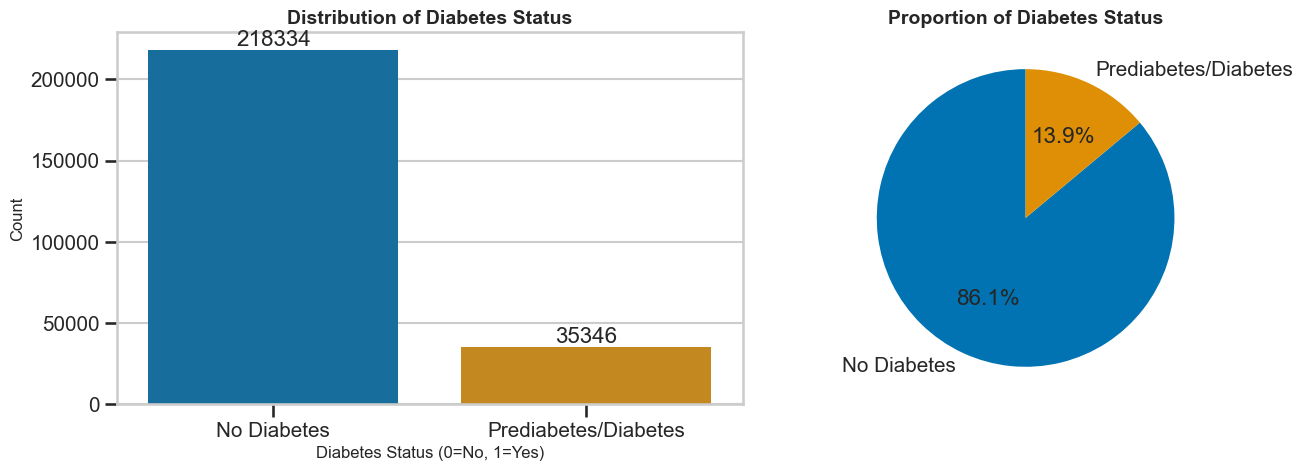


Visualization saved as '01_target_distribution.png'


In [48]:
# =============================================================================
# 7. TARGET VARIABLE ANALYSIS: DIABETES_BINARY
# =============================================================================
print("\n" + "="*80)
print("TARGET VARIABLE ANALYSIS - Diabetes_binary")
print("="*80)

target_counts = df['Diabetes_binary'].value_counts().sort_index()
target_pct = df['Diabetes_binary'].value_counts(normalize=True).sort_index() * 100

print("\nTarget variable distribution:")
print(f"No Diabetes (0): {target_counts[0]:,} ({target_pct[0]:.2f}%)")
print(f"Prediabetes/Diabetes (1): {target_counts[1]:,} ({target_pct[1]:.2f}%)")

# Calculate imbalance ratio
imbalance_ratio = target_counts[0] / target_counts[1]
print(f"\nClass imbalance ratio: {imbalance_ratio:.2f}:1")

if imbalance_ratio > 3:
    print("Significant class imbalance detected. Consider using class weights or resampling techniques.")

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Bar plot
sns.countplot(data=df, x='Diabetes_binary', ax=axes[0], palette='colorblind')
axes[0].set_title('Distribution of Diabetes Status', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Diabetes Status (0=No, 1=Yes)', fontsize=12)
axes[0].set_ylabel('Count', fontsize=12)
axes[0].set_xticklabels(['No Diabetes', 'Prediabetes/Diabetes'])

# Add count labels on bars
for container in axes[0].containers:
    axes[0].bar_label(container, fmt='%d')

# Pie chart
colors = sns.color_palette('colorblind', 2)
axes[1].pie(target_counts, labels=['No Diabetes', 'Prediabetes/Diabetes'], 
            autopct='%1.1f%%', startangle=90, colors=colors)
axes[1].set_title('Proportion of Diabetes Status', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.savefig('01_target_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nVisualization saved as '01_target_distribution.png'")

## Numerical Features


SEX/GENDER ANALYSIS

Sex distribution:
Female (0): 141,974 (55.97%)
Male (1): 111,706 (44.03%)

Diabetes prevalence by sex:
Diabetes_binary        0.0        1.0
Sex                                  
0.0              87.032133  12.967867
1.0              84.839668  15.160332

Chi-square test of association:
Chi-square statistic: 250.4137
P-value: 2.1099e-56
Degrees of freedom: 1
✓ Significant association between sex and diabetes status (p < 0.05)


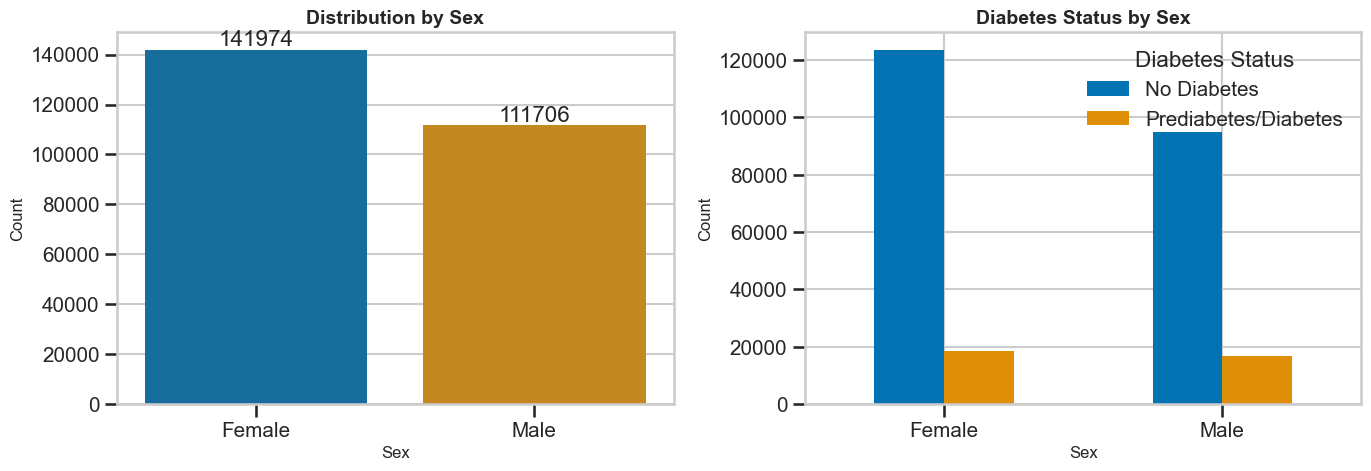


Visualization saved as '02_sex_analysis.png'


In [50]:
from scipy.stats import chi2_contingency

# ============================================================================
# 8. SEX/GENDER ANALYSIS
# ============================================================================
print("\n" + "="*80)
print("SEX/GENDER ANALYSIS")
print("="*80)

# Overall sex distribution
sex_counts = df['Sex'].value_counts().sort_index()
sex_pct = df['Sex'].value_counts(normalize=True).sort_index() * 100

print("\nSex distribution:")
print(f"Female (0): {sex_counts[0]:,} ({sex_pct[0]:.2f}%)")
print(f"Male (1): {sex_counts[1]:,} ({sex_pct[1]:.2f}%)")

# Diabetes prevalence by sex
sex_diabetes = pd.crosstab(df['Sex'], df['Diabetes_binary'], normalize='index') * 100

print("\nDiabetes prevalence by sex:")
print(sex_diabetes)

# Chi-square test
contingency_table = pd.crosstab(df['Sex'], df['Diabetes_binary'])
chi2, p_value, dof, expected = chi2_contingency(contingency_table) # pyright: ignore[reportUndefinedVariable]

print(f"\nChi-square test of association:")
print(f"Chi-square statistic: {chi2:.4f}")
print(f"P-value: {p_value:.4e}")
print(f"Degrees of freedom: {dof}")

if p_value < 0.05: # pyright: ignore[reportOperatorIssue]
    print("✓ Significant association between sex and diabetes status (p < 0.05)")
else:
    print("✗ No significant association between sex and diabetes status (p >= 0.05)")

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Overall sex distribution
sns.countplot(data=df, x='Sex', ax=axes[0], palette='colorblind')
axes[0].set_title('Distribution by Sex', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Sex', fontsize=12)
axes[0].set_ylabel('Count', fontsize=12)
axes[0].set_xticklabels(['Female', 'Male'])

for container in axes[0].containers:
    axes[0].bar_label(container, fmt='%d')

# Diabetes prevalence by sex
sex_diabetes_counts = pd.crosstab(df['Sex'], df['Diabetes_binary'])
sex_diabetes_counts.plot(kind='bar', ax=axes[1], color=sns.color_palette('colorblind', 2))
axes[1].set_title('Diabetes Status by Sex', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Sex', fontsize=12)
axes[1].set_ylabel('Count', fontsize=12)
axes[1].set_xticklabels(['Female', 'Male'], rotation=0)
axes[1].legend(['No Diabetes', 'Prediabetes/Diabetes'], title='Diabetes Status')

plt.tight_layout()
plt.savefig('02_sex_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nVisualization saved as '02_sex_analysis.png'")

## Categorical Features


CATEGORICAL FEATURES ANALYSIS

Binary Health Indicators - Diabetes Prevalence:
------------------------------------------------------------

HighBP:
Diabetes_binary        0.0        1.0
HighBP                               
0.0              93.964833   6.035167
1.0              75.554310  24.445690
  Chi-square: 17562.45, p-value: 0.0000e+00

HighChol:
Diabetes_binary        0.0        1.0
HighChol                             
0.0              92.018564   7.981436
1.0              77.985147  22.014853
  Chi-square: 10174.07, p-value: 0.0000e+00

CholCheck:
Diabetes_binary        0.0        1.0
CholCheck                            
0.0              97.455121   2.544879
1.0              85.625077  14.374923
  Chi-square: 1062.94, p-value: 3.7514e-233

Smoker:
Diabetes_binary        0.0        1.0
Smoker                               
0.0              87.944668  12.055332
1.0              83.707071  16.292929
  Chi-square: 937.06, p-value: 8.6402e-206

Stroke:
Diabetes_binary        0.0

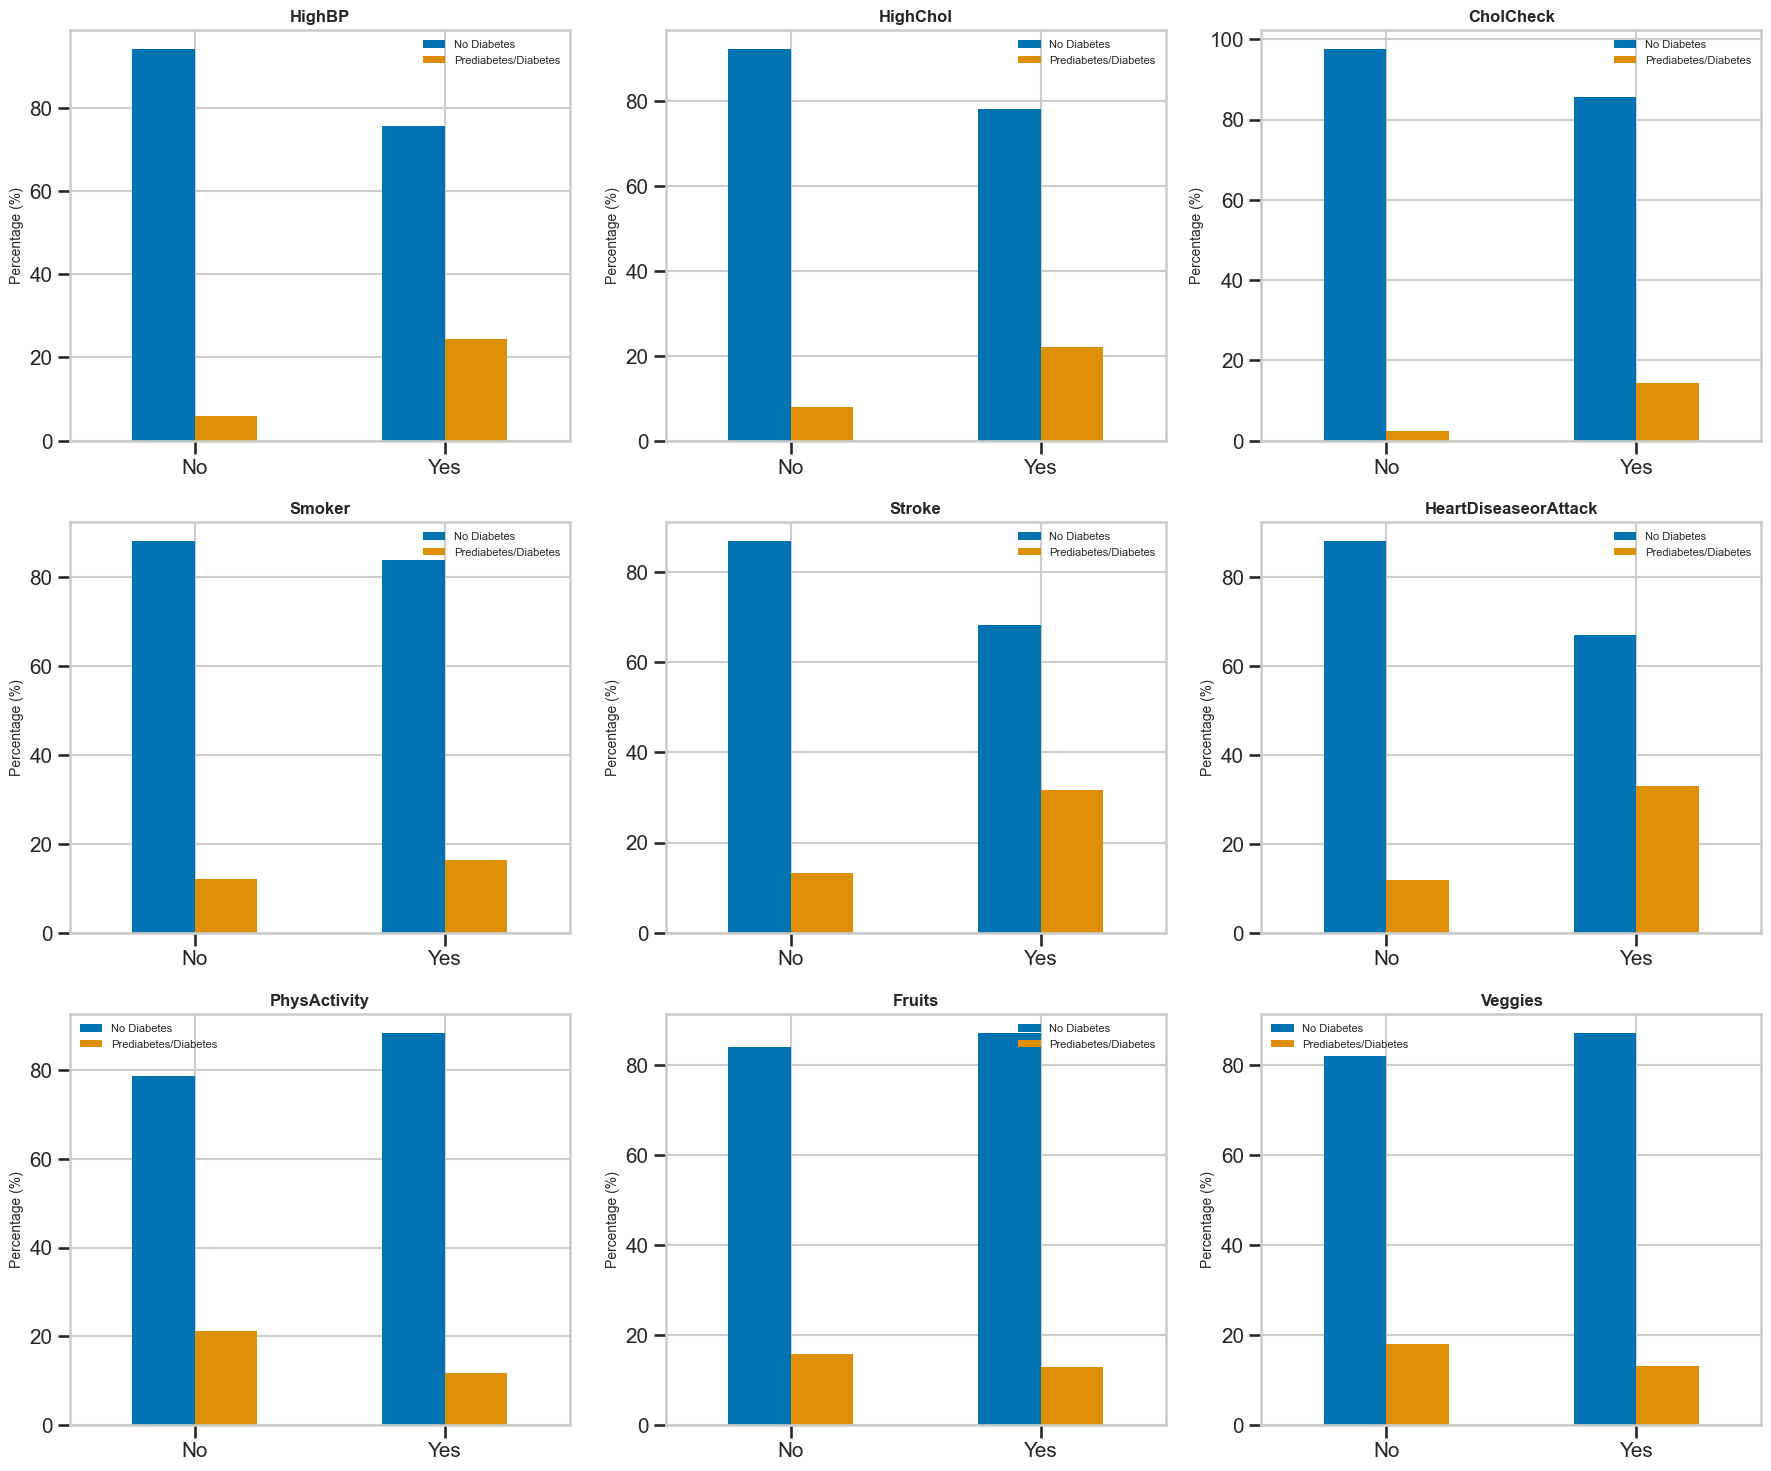


Visualization saved as '03_binary_features_analysis.png'


In [51]:
# ============================================================================
# 9. CATEGORICAL FEATURES ANALYSIS
# ============================================================================
print("\n" + "="*80)
print("CATEGORICAL FEATURES ANALYSIS")
print("="*80)

# Analyze binary health indicators
print("\nBinary Health Indicators - Diabetes Prevalence:")
print("-" * 60)

for feature in binary_health:
    contingency = pd.crosstab(df[feature], df['Diabetes_binary'], normalize='index') * 100
    print(f"\n{feature}:")
    print(contingency)
    
    # Chi-square test
    ct = pd.crosstab(df[feature], df['Diabetes_binary'])
    chi2, p_value, _, _ = chi2_contingency(ct)
    print(f"  Chi-square: {chi2:.2f}, p-value: {p_value:.4e}")

# Visualize key binary indicators
fig, axes = plt.subplots(3, 3, figsize=(18, 15))
axes = axes.ravel()

for idx, feature in enumerate(binary_health[:9]):
    ct = pd.crosstab(df[feature], df['Diabetes_binary'], normalize='index') * 100
    ct.plot(kind='bar', ax=axes[idx], color=sns.color_palette('colorblind', 2))
    axes[idx].set_title(f'{feature}', fontsize=12, fontweight='bold')
    axes[idx].set_xlabel('')
    axes[idx].set_ylabel('Percentage (%)', fontsize=10)
    axes[idx].legend(['No Diabetes', 'Prediabetes/Diabetes'], fontsize=8)
    axes[idx].set_xticklabels(['No', 'Yes'], rotation=0)

plt.tight_layout()
plt.savefig('03_binary_features_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nVisualization saved as '03_binary_features_analysis.png'")




Ordinal Features - Diabetes Prevalence:
------------------------------------------------------------

GenHlth:
Diabetes_binary        0.0        1.0
GenHlth                              
1.0              97.483388   2.516612
2.0              92.837098   7.162902
3.0              82.210560  17.789440
4.0              68.989547  31.010453
5.0              62.105786  37.894214

Age:
Diabetes_binary        0.0        1.0
Age                                  
1.0              98.631579   1.368421
2.0              98.157410   1.842590
3.0              97.177021   2.822979
4.0              95.471316   4.528684
5.0              93.495080   6.504920
6.0              91.210455   8.789545
7.0              88.264802  11.735198
8.0              86.173456  13.826544
9.0              82.754783  17.245217
10.0             79.629745  20.370255
11.0             78.154082  21.845918
12.0             78.704631  21.295369
13.0             81.518171  18.481829

Education:
Diabetes_binary        0.0        

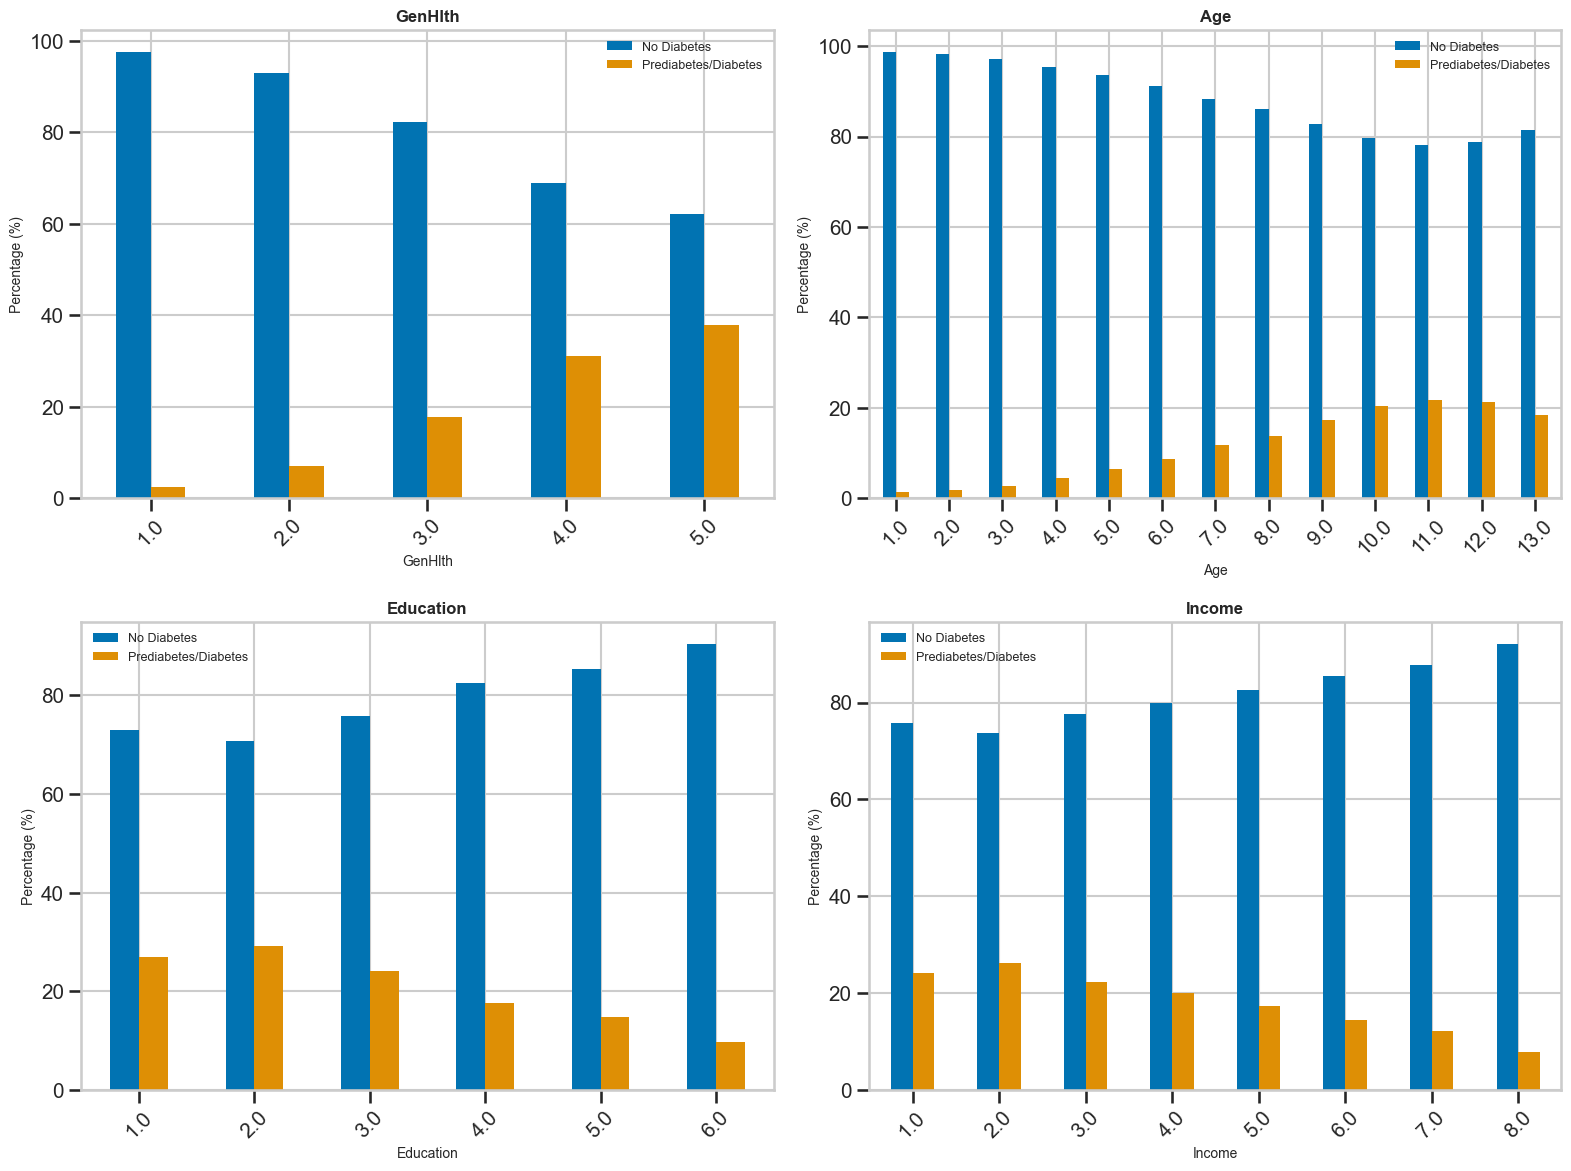


Visualization saved as '04_ordinal_features_analysis.png'


In [52]:
# Analyze ordinal features
print("\n" + "="*80)
print("Ordinal Features - Diabetes Prevalence:")
print("-" * 60)

for feature in ordinal:
    contingency = pd.crosstab(df[feature], df['Diabetes_binary'], normalize='index') * 100
    print(f"\n{feature}:")
    print(contingency)

# Visualize ordinal features
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.ravel()

for idx, feature in enumerate(ordinal):
    ct = pd.crosstab(df[feature], df['Diabetes_binary'], normalize='index') * 100
    ct.plot(kind='bar', ax=axes[idx], color=sns.color_palette('colorblind', 2))
    axes[idx].set_title(f'{feature}', fontsize=12, fontweight='bold')
    axes[idx].set_xlabel(feature, fontsize=10)
    axes[idx].set_ylabel('Percentage (%)', fontsize=10)
    axes[idx].legend(['No Diabetes', 'Prediabetes/Diabetes'], fontsize=9)
    axes[idx].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.savefig('04_ordinal_features_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nVisualization saved as '04_ordinal_features_analysis.png'")

## BMI

In [53]:
# ============================================================================
# 10. BMI DETAILED ANALYSIS
# ============================================================================
print("\n" + "="*80)
print("BMI DETAILED ANALYSIS")
print("="*80)

# Basic statistics
print("\nBMI Statistics:")
print(df['BMI'].describe())

# Additional statistics
print(f"\nSkewness: {df['BMI'].skew():.3f}")
print(f"Kurtosis: {df['BMI'].kurtosis():.3f}")

# Note about distribution
print("\nDistribution Note:")
print("BMI shows left-skewed distribution (negative skew), indicating more")
print("individuals with higher BMI values than lower ones in this population.")

# Clinical extreme values (for diagnostic purposes only)
print("\n" + "-"*60)
print("CLINICAL EXTREME VALUE ASSESSMENT (Diagnostic Only)")
print("-"*60)

# WHO clinical thresholds
bmi_severely_underweight = (df['BMI'] < 16).sum()
bmi_extremely_obese = (df['BMI'] >= 40).sum()

print(f"\nClinically extreme BMI values:")
print(f"  Severely underweight (BMI < 16): {bmi_severely_underweight} ({bmi_severely_underweight/len(df)*100:.2f}%)")
print(f"  Class III Obesity (BMI >= 40): {bmi_extremely_obese} ({bmi_extremely_obese/len(df)*100:.2f}%)")

# IQR-based assessment (diagnostic only, not for removal)
Q1 = df['BMI'].quantile(0.25)
Q3 = df['BMI'].quantile(0.75)
IQR = Q3 - Q1
lower_fence = Q1 - 1.5 * IQR
upper_fence = Q3 + 1.5 * IQR

n_below_fence = (df['BMI'] < lower_fence).sum()
n_above_fence = (df['BMI'] > upper_fence).sum()

print(f"\nIQR-based assessment (Q1={Q1:.1f}, Q3={Q3:.1f}, IQR={IQR:.1f}):")
print(f"  Below lower fence ({lower_fence:.1f}): {n_below_fence} ({n_below_fence/len(df)*100:.2f}%)")
print(f"  Above upper fence ({upper_fence:.1f}): {n_above_fence} ({n_above_fence/len(df)*100:.2f}%)")

print("\n⚠ Note: These are diagnostic indicators only. Extreme values are NOT removed")
print("as they represent real medical conditions. Robust modeling techniques will be")
print("used during preprocessing to handle the influence of extreme values.")

# BMI categories (WHO classification)
df['BMI_Category'] = pd.cut(df['BMI'], 
                             bins=[0, 18.5, 25, 30, 35, 40, 100],
                             labels=['Underweight', 'Normal', 'Overweight', 
                                    'Obese I', 'Obese II', 'Obese III'])

print("\n" + "-"*60)
print("BMI Categories (WHO Classification):")
print("-"*60)
bmi_cat_counts = df['BMI_Category'].value_counts().sort_index()
bmi_cat_pct = df['BMI_Category'].value_counts(normalize=True).sort_index() * 100

for cat in bmi_cat_counts.index:
    print(f"{cat:15s}: {bmi_cat_counts[cat]:6,} ({bmi_cat_pct[cat]:5.2f}%)")

# Diabetes prevalence by BMI category
print("\nDiabetes prevalence by BMI category:")
bmi_diabetes = pd.crosstab(df['BMI_Category'], df['Diabetes_binary'], normalize='index') * 100
print(bmi_diabetes)




BMI DETAILED ANALYSIS

BMI Statistics:
count    253680.000000
mean         28.382364
std           6.608694
min          12.000000
25%          24.000000
50%          27.000000
75%          31.000000
max          98.000000
Name: BMI, dtype: float64

Skewness: 2.122
Kurtosis: 10.997

Distribution Note:
BMI shows left-skewed distribution (negative skew), indicating more
individuals with higher BMI values than lower ones in this population.

------------------------------------------------------------
CLINICAL EXTREME VALUE ASSESSMENT (Diagnostic Only)
------------------------------------------------------------

Clinically extreme BMI values:
  Severely underweight (BMI < 16): 200 (0.08%)
  Class III Obesity (BMI >= 40): 13737 (5.42%)

IQR-based assessment (Q1=24.0, Q3=31.0, IQR=7.0):
  Below lower fence (13.5): 27 (0.01%)
  Above upper fence (41.5): 9820 (3.87%)

⚠ Note: These are diagnostic indicators only. Extreme values are NOT removed
as they represent real medical conditions. Robu

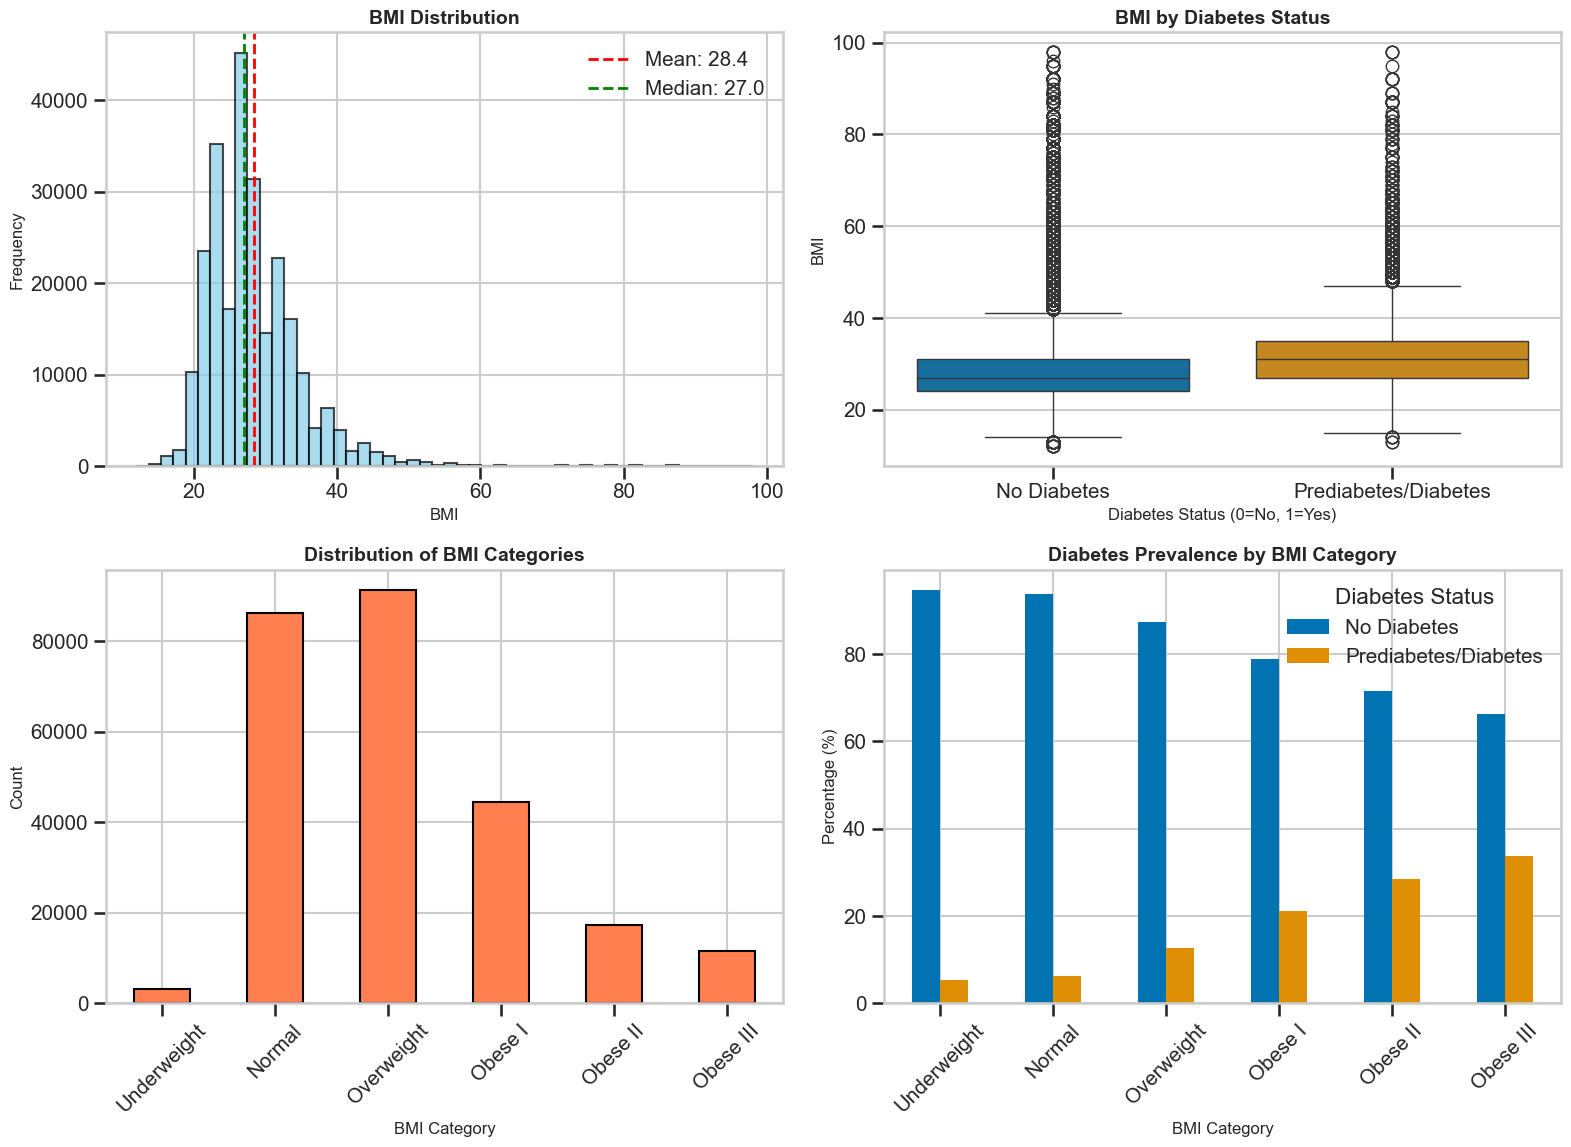


Visualization saved as '05_bmi_analysis.png'


In [59]:
# Visualization
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# BMI distribution
axes[0, 0].hist(df['BMI'], bins=50, color='skyblue', edgecolor='black', alpha=0.7)
axes[0, 0].axvline(df['BMI'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {df["BMI"].mean():.1f}')
axes[0, 0].axvline(df['BMI'].median(), color='green', linestyle='--', linewidth=2, label=f'Median: {df["BMI"].median():.1f}')
axes[0, 0].set_title('BMI Distribution', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('BMI', fontsize=12)
axes[0, 0].set_ylabel('Frequency', fontsize=12)
axes[0, 0].legend()

# BMI by diabetes status
sns.boxplot(data=df, x='Diabetes_binary', y='BMI', ax=axes[0, 1], palette=sns.color_palette('colorblind', 2))
axes[0, 1].set_title('BMI by Diabetes Status', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Diabetes Status (0=No, 1=Yes)', fontsize=12)
axes[0, 1].set_ylabel('BMI', fontsize=12)
axes[0, 1].set_xticklabels(['No Diabetes', 'Prediabetes/Diabetes'])
plt.suptitle('')

# BMI categories distribution
bmi_cat_counts.plot(kind='bar', ax=axes[1, 0], color='coral', edgecolor='black')
axes[1, 0].set_title('Distribution of BMI Categories', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('BMI Category', fontsize=12)
axes[1, 0].set_ylabel('Count', fontsize=12)
axes[1, 0].tick_params(axis='x', rotation=45)

# Diabetes prevalence by BMI category
bmi_diabetes.plot(kind='bar', ax=axes[1, 1], color=sns.color_palette('colorblind', 2))
axes[1, 1].set_title('Diabetes Prevalence by BMI Category', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('BMI Category', fontsize=12)
axes[1, 1].set_ylabel('Percentage (%)', fontsize=12)
axes[1, 1].legend(['No Diabetes', 'Prediabetes/Diabetes'], title='Diabetes Status')
axes[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.savefig('05_bmi_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nVisualization saved as '05_bmi_analysis.png'")

# Clean up temporary column
#df.drop('BMI_Category', axis=1, inplace=True)


## Age

In [61]:
# ============================================================================
# 11. AGE DISTRIBUTION AND ANALYSIS
# ============================================================================
print("\n" + "="*80)
print("AGE DISTRIBUTION AND ANALYSIS")
print("="*80)

# Age mapping
age_mapping = {
    1: '18-24', 2: '25-29', 3: '30-34', 4: '35-39',
    5: '40-44', 6: '45-49', 7: '50-54', 8: '55-59',
    9: '60-64', 10: '65-69', 11: '70-74', 12: '75-79',
    13: '80+'
}

df['Age_Group'] = df['Age'].map(age_mapping)

# Age distribution
age_counts = df['Age_Group'].value_counts().sort_index()
age_pct = df['Age_Group'].value_counts(normalize=True).sort_index() * 100

print("\nAge distribution:")
for age_group in age_mapping.values():
    if age_group in age_counts.index:
        print(f"{age_group:10s}: {age_counts[age_group]:6,} ({age_pct[age_group]:5.2f}%)")

# Diabetes prevalence by age
age_diabetes = pd.crosstab(df['Age_Group'], df['Diabetes_binary'], normalize='index') * 100

print("\nDiabetes prevalence by age group:")
print(age_diabetes)




AGE DISTRIBUTION AND ANALYSIS

Age distribution:
18-24     :  5,700 ( 2.25%)
25-29     :  7,598 ( 3.00%)
30-34     : 11,123 ( 4.38%)
35-39     : 13,823 ( 5.45%)
40-44     : 16,157 ( 6.37%)
45-49     : 19,819 ( 7.81%)
50-54     : 26,314 (10.37%)
55-59     : 30,832 (12.15%)
60-64     : 33,244 (13.10%)
65-69     : 32,194 (12.69%)
70-74     : 23,533 ( 9.28%)
75-79     : 15,980 ( 6.30%)
80+       : 17,363 ( 6.84%)

Diabetes prevalence by age group:
Diabetes_binary        0.0        1.0
Age_Group                            
18-24            98.631579   1.368421
25-29            98.157410   1.842590
30-34            97.177021   2.822979
35-39            95.471316   4.528684
40-44            93.495080   6.504920
45-49            91.210455   8.789545
50-54            88.264802  11.735198
55-59            86.173456  13.826544
60-64            82.754783  17.245217
65-69            79.629745  20.370255
70-74            78.154082  21.845918
75-79            78.704631  21.295369
80+              81

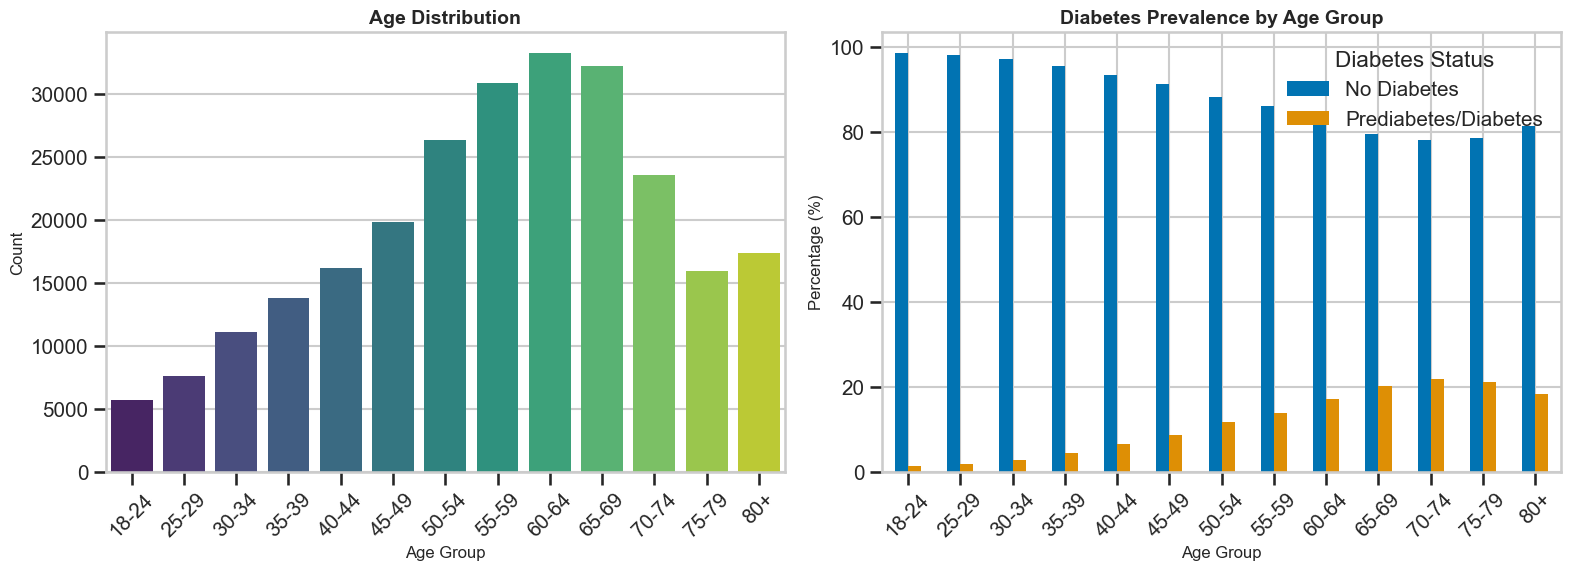


✓ Visualization saved as '06_age_analysis.png'


In [62]:
# Visualization
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Age distribution
age_order = list(age_mapping.values())
sns.countplot(data=df, x='Age_Group', order=age_order, ax=axes[0], palette='viridis')
axes[0].set_title('Age Distribution', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Age Group', fontsize=12)
axes[0].set_ylabel('Count', fontsize=12)
axes[0].tick_params(axis='x', rotation=45)

# Diabetes prevalence by age
age_diabetes_sorted = age_diabetes.reindex(age_order)
age_diabetes_sorted.plot(kind='bar', ax=axes[1], color=sns.color_palette('colorblind', 2))
axes[1].set_title('Diabetes Prevalence by Age Group', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Age Group', fontsize=12)
axes[1].set_ylabel('Percentage (%)', fontsize=12)
axes[1].legend(['No Diabetes', 'Prediabetes/Diabetes'], title='Diabetes Status')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.savefig('06_age_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✓ Visualization saved as '06_age_analysis.png'")

# Clean up temporary column
df.drop('Age_Group', axis=1, inplace=True)

## General Health


GENERAL HEALTH ANALYSIS

General Health distribution:
Excellent    (1): 45,299 (17.86%)
Very Good    (2): 89,084 (35.12%)
Good         (3): 75,646 (29.82%)
Fair         (4): 31,570 (12.44%)
Poor         (5): 12,081 ( 4.76%)

Diabetes prevalence by general health status:
Diabetes_binary        0.0        1.0
GenHlth                              
1.0              97.483388   2.516612
2.0              92.837098   7.162902
3.0              82.210560  17.789440
4.0              68.989547  31.010453
5.0              62.105786  37.894214


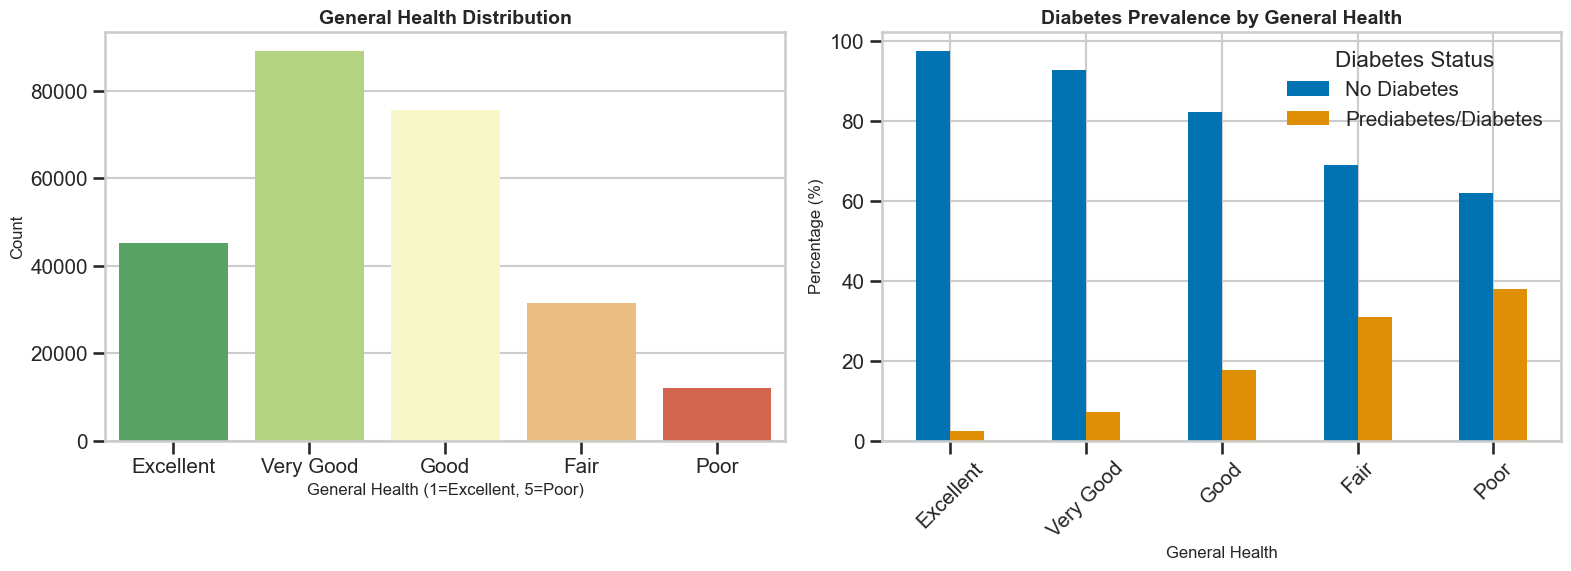


Visualization saved as '07_general_health_analysis.png'


In [63]:
# ============================================================================
# 12. GENERAL HEALTH ANALYSIS
# ============================================================================
print("\n" + "="*80)
print("GENERAL HEALTH ANALYSIS")
print("="*80)

# General health distribution
genhlth_counts = df['GenHlth'].value_counts().sort_index()
genhlth_pct = df['GenHlth'].value_counts(normalize=True).sort_index() * 100

genhlth_labels = {1: 'Excellent', 2: 'Very Good', 3: 'Good', 4: 'Fair', 5: 'Poor'}

print("\nGeneral Health distribution:")
for level, label in genhlth_labels.items():
    if level in genhlth_counts.index:
        print(f"{label:12s} ({level}): {genhlth_counts[level]:6,} ({genhlth_pct[level]:5.2f}%)")

# Diabetes prevalence by general health
genhlth_diabetes = pd.crosstab(df['GenHlth'], df['Diabetes_binary'], normalize='index') * 100

print("\nDiabetes prevalence by general health status:")
print(genhlth_diabetes)

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# General health distribution
sns.countplot(data=df, x='GenHlth', ax=axes[0], palette='RdYlGn_r')
axes[0].set_title('General Health Distribution', fontsize=14, fontweight='bold')
axes[0].set_xlabel('General Health (1=Excellent, 5=Poor)', fontsize=12)
axes[0].set_ylabel('Count', fontsize=12)
axes[0].set_xticklabels(['Excellent', 'Very Good', 'Good', 'Fair', 'Poor'])

# Diabetes prevalence by general health
genhlth_diabetes.plot(kind='bar', ax=axes[1], color=sns.color_palette('colorblind', 2))
axes[1].set_title('Diabetes Prevalence by General Health', fontsize=14, fontweight='bold')
axes[1].set_xlabel('General Health', fontsize=12)
axes[1].set_ylabel('Percentage (%)', fontsize=12)
axes[1].legend(['No Diabetes', 'Prediabetes/Diabetes'], title='Diabetes Status')
axes[1].set_xticklabels(['Excellent', 'Very Good', 'Good', 'Fair', 'Poor'], rotation=45)

plt.tight_layout()
plt.savefig('07_general_health_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nVisualization saved as '07_general_health_analysis.png'")


## Continuous Features


CONTINUOUS FEATURES ANALYSIS

MentHlth Statistics:
count    253680.000000
mean          3.184772
std           7.412847
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max          30.000000
Name: MentHlth, dtype: float64
Skewness: 2.721
Kurtosis: 6.442
Zero days (healthy): 175,680 (69.25%)
30 days (maximum): 12,088 (4.77%)

PhysHlth Statistics:
count    253680.000000
mean          4.242081
std           8.717951
min           0.000000
25%           0.000000
50%           0.000000
75%           3.000000
max          30.000000
Name: PhysHlth, dtype: float64
Skewness: 2.207
Kurtosis: 3.496
Zero days (healthy): 160,052 (63.09%)
30 days (maximum): 19,400 (7.65%)


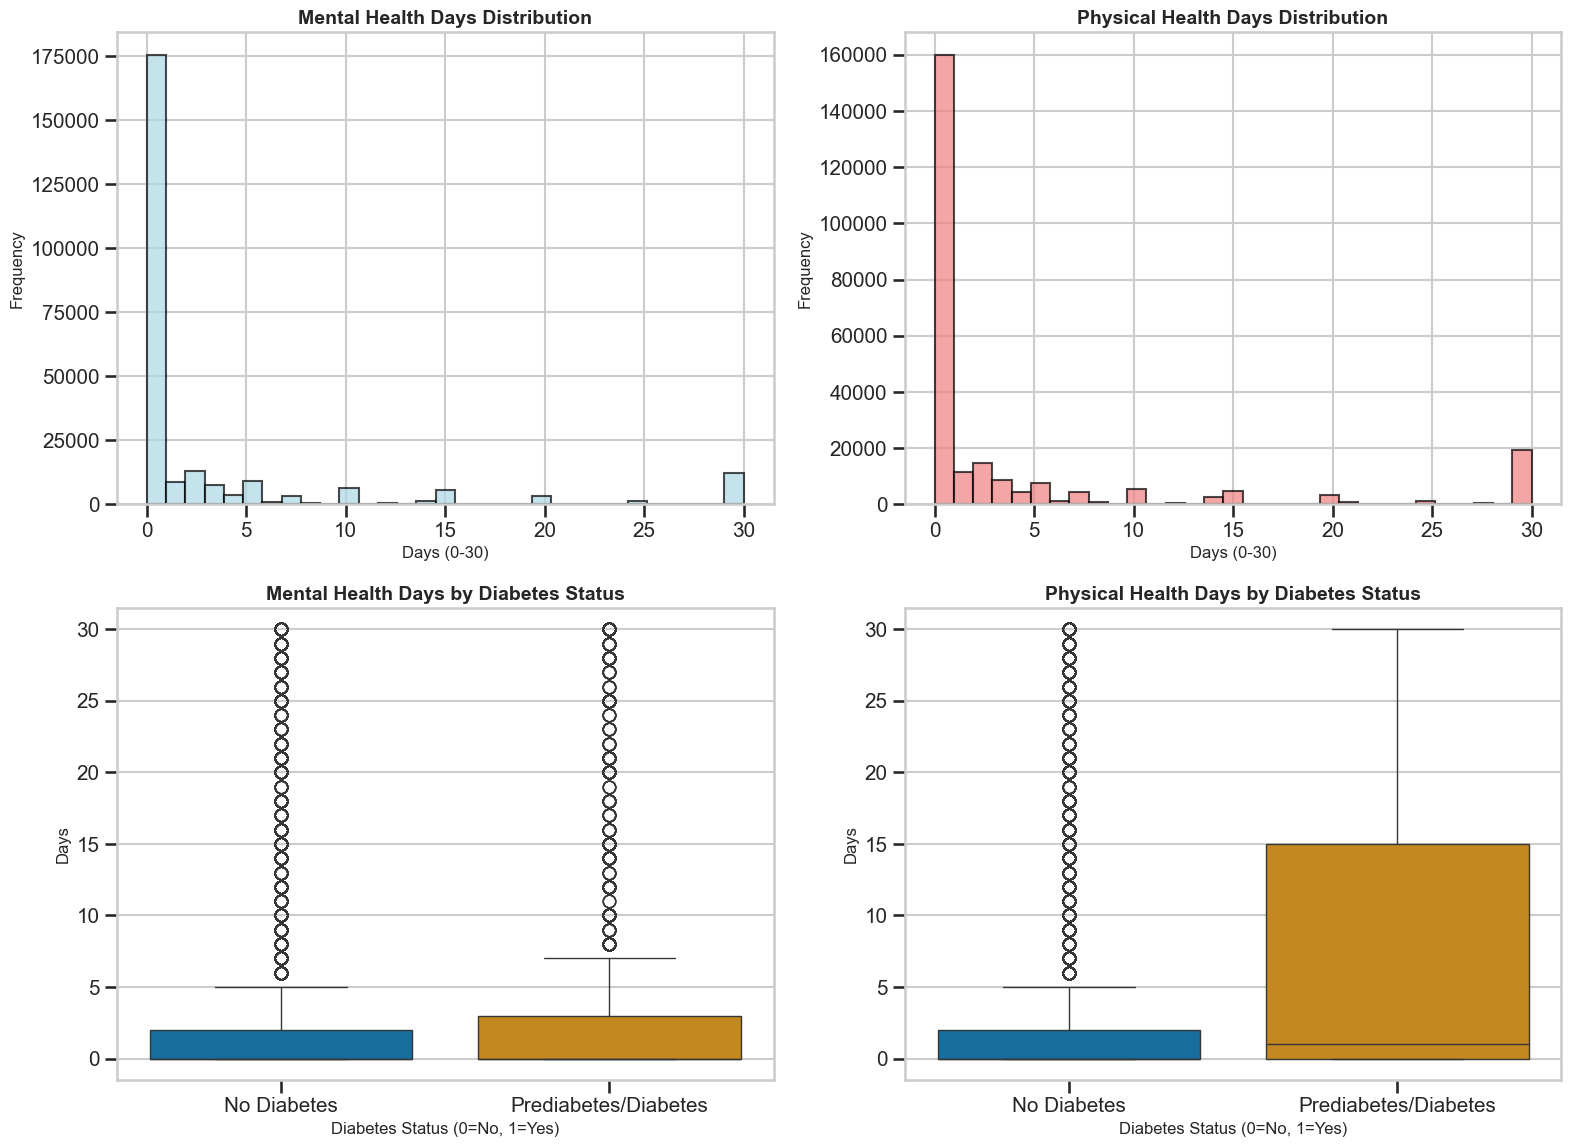


Visualization saved as '08_continuous_features_analysis.png'


In [65]:
# ============================================================================
# 13. CONTINUOUS FEATURES ANALYSIS
# ============================================================================
print("\n" + "="*80)
print("CONTINUOUS FEATURES ANALYSIS")
print("="*80)

# Analyze MentHlth and PhysHlth
for feature in ['MentHlth', 'PhysHlth']:
    print(f"\n{feature} Statistics:")
    print(df[feature].describe())
    print(f"Skewness: {df[feature].skew():.3f}")
    print(f"Kurtosis: {df[feature].kurtosis():.3f}")
    
    # Count of zero days
    zero_days = (df[feature] == 0).sum()
    zero_pct = (zero_days / len(df)) * 100
    print(f"Zero days (healthy): {zero_days:,} ({zero_pct:.2f}%)")
    
    # Count of 30 days (maximum)
    max_days = (df[feature] == 30).sum()
    max_pct = (max_days / len(df)) * 100
    print(f"30 days (maximum): {max_days:,} ({max_pct:.2f}%)")

# Visualization
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# MentHlth distribution
axes[0, 0].hist(df['MentHlth'], bins=31, color='lightblue', edgecolor='black', alpha=0.7)
axes[0, 0].set_title('Mental Health Days Distribution', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Days (0-30)', fontsize=12)
axes[0, 0].set_ylabel('Frequency', fontsize=12)

# PhysHlth distribution
axes[0, 1].hist(df['PhysHlth'], bins=31, color='lightcoral', edgecolor='black', alpha=0.7)
axes[0, 1].set_title('Physical Health Days Distribution', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Days (0-30)', fontsize=12)
axes[0, 1].set_ylabel('Frequency', fontsize=12)

# MentHlth by diabetes status
sns.boxplot(data=df, x='Diabetes_binary', y='MentHlth', ax=axes[1, 0], palette=sns.color_palette('colorblind', 2))
axes[1, 0].set_title('Mental Health Days by Diabetes Status', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Diabetes Status (0=No, 1=Yes)', fontsize=12)
axes[1, 0].set_ylabel('Days', fontsize=12)
axes[1, 0].set_xticklabels(['No Diabetes', 'Prediabetes/Diabetes'])
plt.suptitle('')

# PhysHlth by diabetes status
sns.boxplot(data=df, x='Diabetes_binary', y='PhysHlth', ax=axes[1, 1], palette=sns.color_palette('colorblind', 2))
axes[1, 1].set_title('Physical Health Days by Diabetes Status', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('Diabetes Status (0=No, 1=Yes)', fontsize=12)
axes[1, 1].set_ylabel('Days', fontsize=12)
axes[1, 1].set_xticklabels(['No Diabetes', 'Prediabetes/Diabetes'])
plt.suptitle('')

plt.tight_layout()
plt.savefig('08_continuous_features_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nVisualization saved as '08_continuous_features_analysis.png'")

## Comorbidities and Lifestyle Factors


KEY COMORBIDITIES AND LIFESTYLE FACTORS

Diabetes prevalence by key risk factors:
------------------------------------------------------------

HighBP:
  No (0): 6.04%
  Yes (1): 24.45%
  Difference: 18.41 percentage points

HighChol:
  No (0): 7.98%
  Yes (1): 22.01%
  Difference: 14.03 percentage points

HeartDiseaseorAttack:
  No (0): 11.95%
  Yes (1): 32.97%
  Difference: 21.02 percentage points

Stroke:
  No (0): 13.18%
  Yes (1): 31.75%
  Difference: 18.57 percentage points

PhysActivity:
  No (0): 21.14%
  Yes (1): 11.61%
  Difference: -9.53 percentage points

Smoker:
  No (0): 12.06%
  Yes (1): 16.29%
  Difference: 4.24 percentage points

HvyAlcoholConsump:
  No (0): 14.42%
  Yes (1): 5.84%
  Difference: -8.58 percentage points


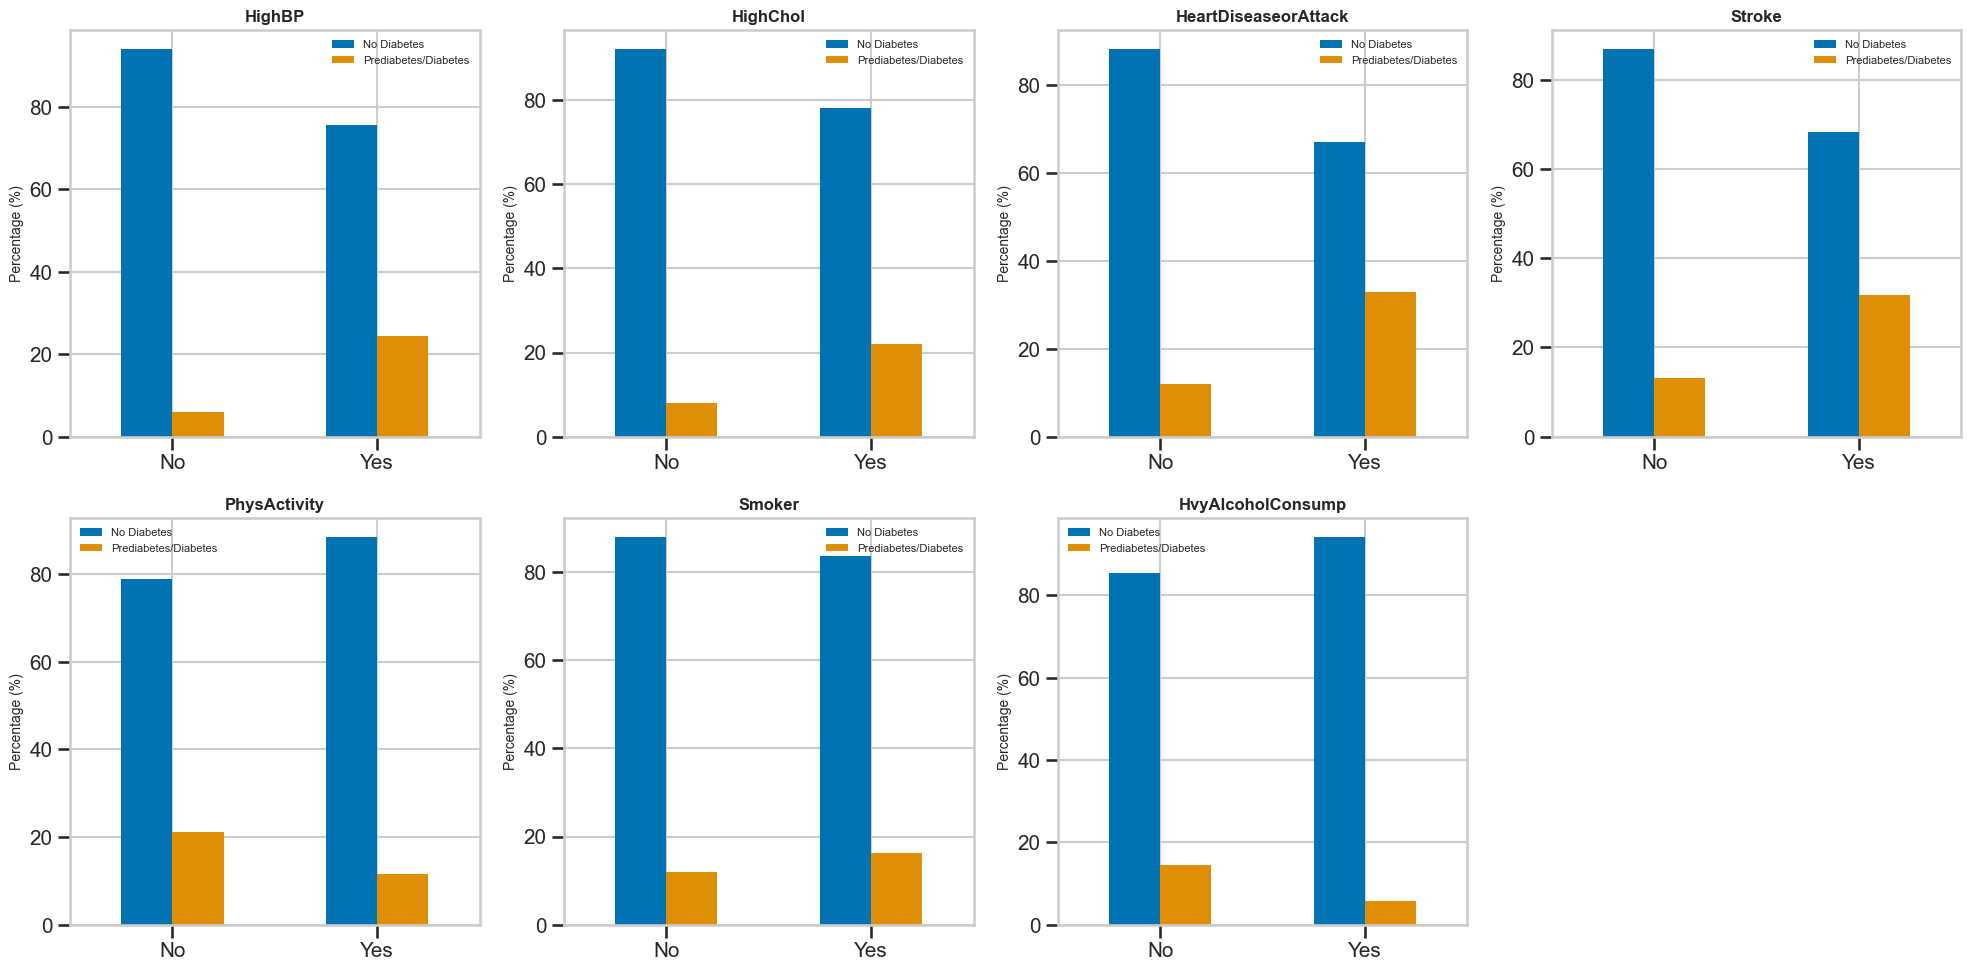


Visualization saved as '09_key_risk_factors.png'


In [66]:
# ============================================================================
# 14. KEY COMORBIDITIES AND LIFESTYLE FACTORS
# ============================================================================
print("\n" + "="*80)
print("KEY COMORBIDITIES AND LIFESTYLE FACTORS")
print("="*80)

# Select key features for analysis
key_features = ['HighBP', 'HighChol', 'HeartDiseaseorAttack', 'Stroke', 
                'PhysActivity', 'Smoker', 'HvyAlcoholConsump']

print("\nDiabetes prevalence by key risk factors:")
print("-" * 60)

for feature in key_features:
    diabetes_prev = df.groupby(feature)['Diabetes_binary'].apply(
        lambda x: (x == 1).sum() / len(x) * 100
    )
    print(f"\n{feature}:")
    print(f"  No (0): {diabetes_prev[0]:.2f}%")
    print(f"  Yes (1): {diabetes_prev[1]:.2f}%")
    print(f"  Difference: {diabetes_prev[1] - diabetes_prev[0]:.2f} percentage points")

# Visualization
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.ravel()

for idx, feature in enumerate(key_features):
    ct = pd.crosstab(df[feature], df['Diabetes_binary'], normalize='index') * 100
    ct.plot(kind='bar', ax=axes[idx], color=sns.color_palette('colorblind', 2))
    axes[idx].set_title(f'{feature}', fontsize=12, fontweight='bold')
    axes[idx].set_xlabel('')
    axes[idx].set_ylabel('Percentage (%)', fontsize=10)
    axes[idx].legend(['No Diabetes', 'Prediabetes/Diabetes'], fontsize=8)
    axes[idx].set_xticklabels(['No', 'Yes'], rotation=0)

# Remove empty subplot
fig.delaxes(axes[7])

plt.tight_layout()
plt.savefig('09_key_risk_factors.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nVisualization saved as '09_key_risk_factors.png'")

## Correlation Analysis


SECTION 15: CORRELATION ANALYSIS

Top 15 correlations with Diabetes_binary:
GenHlth                 0.293569
HighBP                  0.263129
DiffWalk                0.218344
BMI                     0.216843
HighChol                0.200276
Age                     0.177442
HeartDiseaseorAttack    0.177282
PhysHlth                0.171337
Stroke                  0.105816
MentHlth                0.069315
CholCheck               0.064761
Smoker                  0.060789
NoDocbcCost             0.031433
Sex                     0.031430
AnyHealthcare           0.016255
Name: Diabetes_binary, dtype: float64

Bottom 5 correlations with Diabetes_binary:
Veggies             -0.056584
HvyAlcoholConsump   -0.057056
PhysActivity        -0.118133
Education           -0.124456
Income              -0.163919
Name: Diabetes_binary, dtype: float64


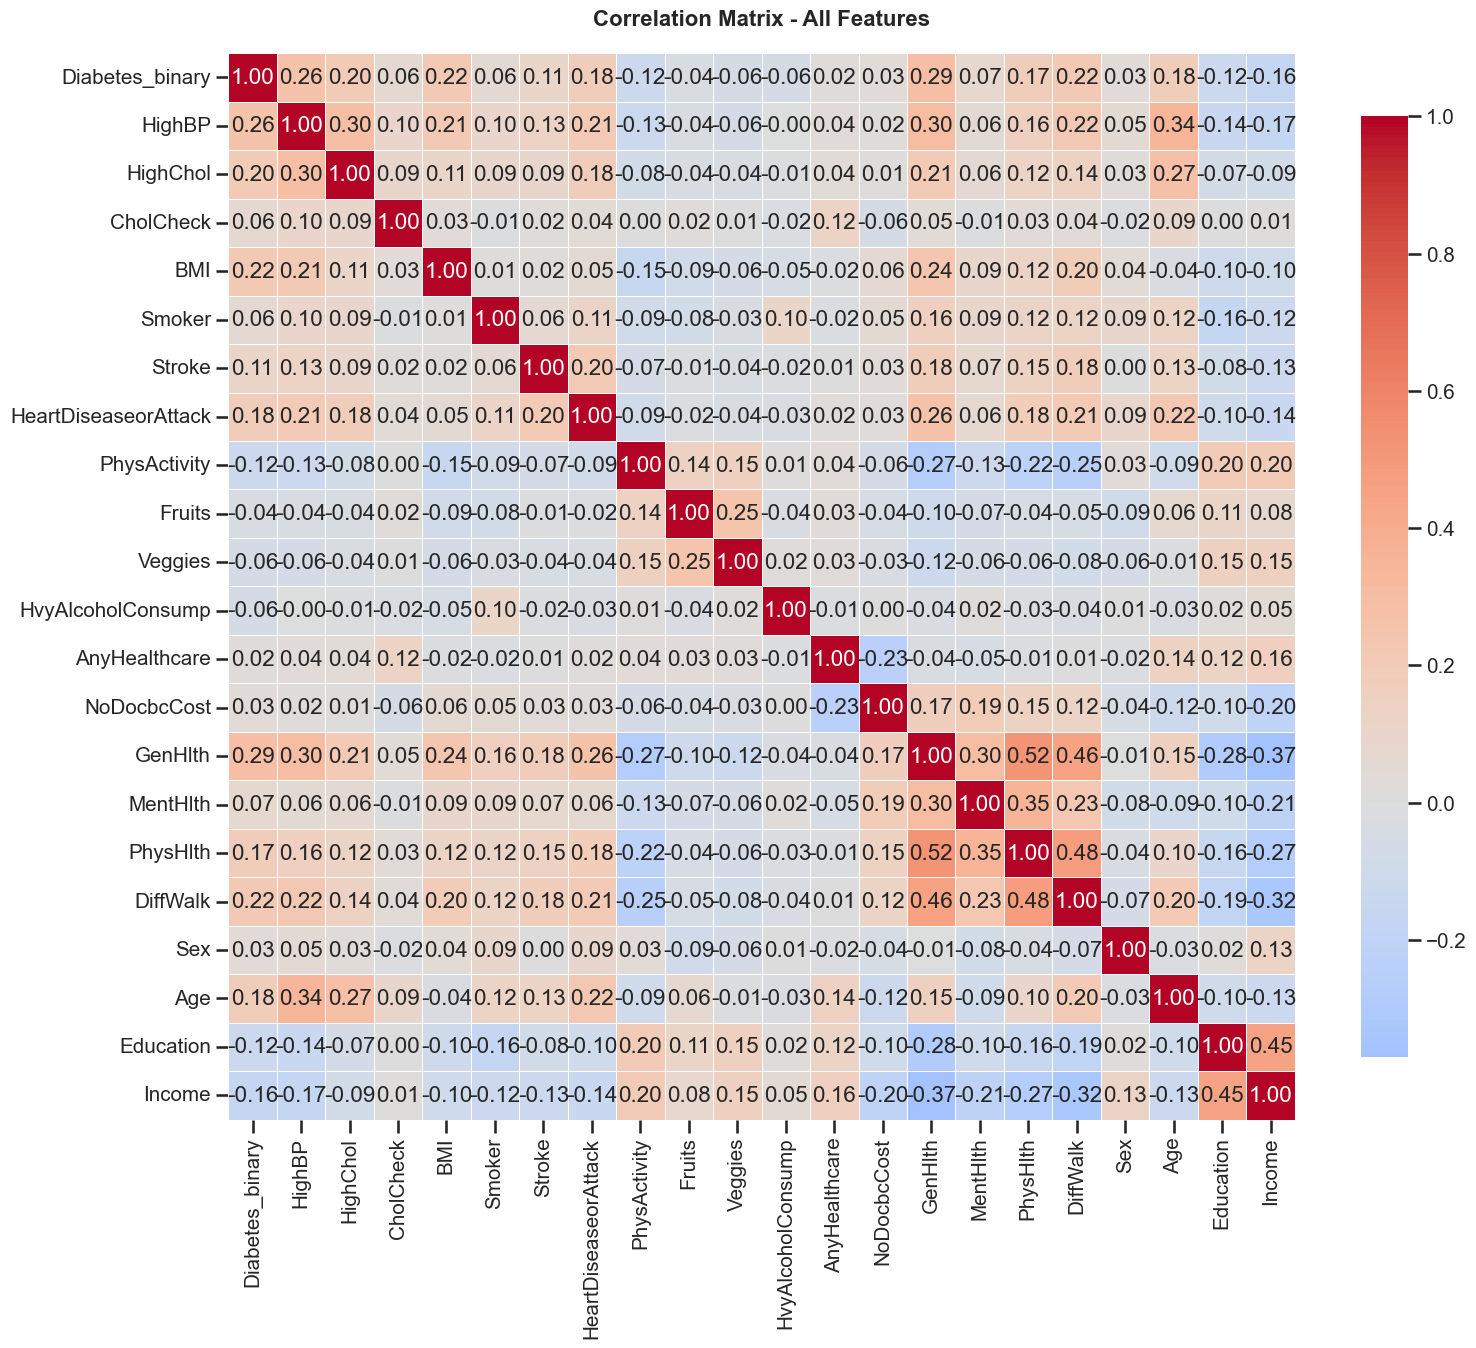


Visualization saved as '10_correlation_matrix.png'


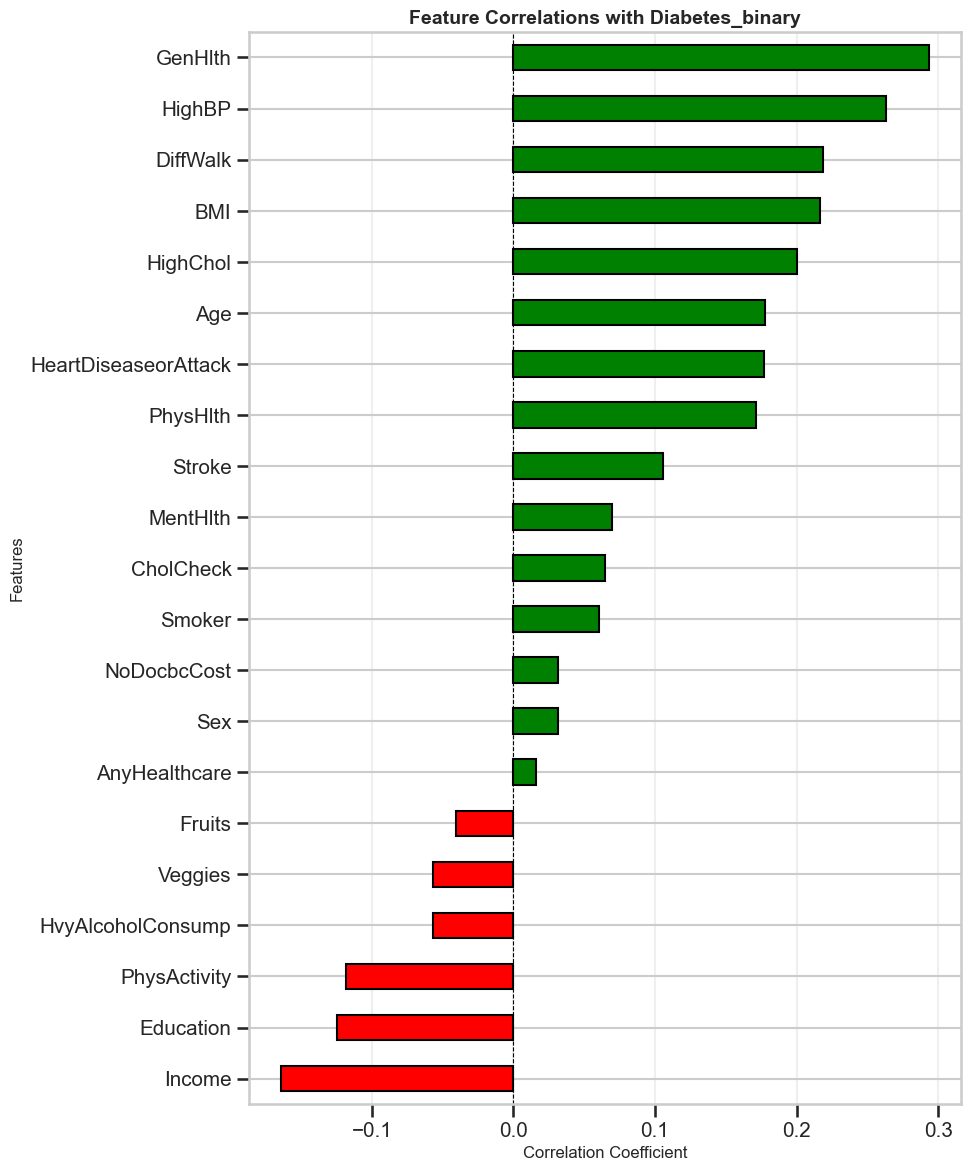


Visualization saved as '11_target_correlations.png'


In [67]:
# ============================================================================
# SECTION 15: CORRELATION ANALYSIS
# ============================================================================
print("\n" + "="*80)
print("SECTION 15: CORRELATION ANALYSIS")
print("="*80)

# Convert categorical to numeric for correlation
df_numeric = df.copy()
for col in df_numeric.select_dtypes(include=['category']).columns:
    df_numeric[col] = df_numeric[col].astype(int)

# Calculate correlation matrix
correlation_matrix = df_numeric.corr()

# Get correlations with target variable
target_corr = correlation_matrix['Diabetes_binary'].sort_values(ascending=False)

print("\nTop 15 correlations with Diabetes_binary:")
print(target_corr.head(16)[1:])  # Exclude self-correlation

print("\nBottom 5 correlations with Diabetes_binary:")
print(target_corr.tail(5))

# Visualization - Full correlation heatmap
plt.figure(figsize=(16, 14))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix - All Features', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.savefig('10_correlation_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nVisualization saved as '10_correlation_matrix.png'")

# Visualization - Target correlations
plt.figure(figsize=(10, 12))
target_corr_sorted = target_corr.drop('Diabetes_binary').sort_values()
colors = ['red' if x < 0 else 'green' for x in target_corr_sorted]
target_corr_sorted.plot(kind='barh', color=colors, edgecolor='black')
plt.title('Feature Correlations with Diabetes_binary', fontsize=14, fontweight='bold')
plt.xlabel('Correlation Coefficient', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.axvline(x=0, color='black', linestyle='--', linewidth=0.8)
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.savefig('11_target_correlations.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nVisualization saved as '11_target_correlations.png'")

## Summary

In [ ]:
# ============================================================================
# 16. SUMMARY AND KEY FINDINGS
# ============================================================================
print("\n" + "="*80)
print("SUMMARY AND KEY FINDINGS")
print("="*80)

print("\nDATASET OVERVIEW:")
print(f"• Total records: {len(df):,}")
print(f"• Total features: {df.shape[1]}")
print(f"• Missing values: {df.isnull().sum().sum()}")
print(f"• Duplicate records: {n_exact_duplicates:,} ({pct_exact_duplicates:.2f}%)")

print("\nTARGET VARIABLE (Diabetes_binary):")
print(f"• No Diabetes (0): {target_counts[0]:,} ({target_pct[0]:.2f}%)")
print(f"• Prediabetes/Diabetes (1): {target_counts[1]:,} ({target_pct[1]:.2f}%)")
print(f"• Imbalance ratio: {imbalance_ratio:.2f}:1")

print("\nBMI INSIGHTS:")
print(f"• Mean BMI: {df['BMI'].mean():.2f}")
print(f"• Median BMI: {df['BMI'].median():.2f}")
print(f"• BMI shows left-skewed distribution (skewness: {df['BMI'].skew():.3f})")
print(f"• Class III Obesity (BMI >= 40): {bmi_extremely_obese:,} ({bmi_extremely_obese/len(df)*100:.2f}%)")

print("\nAGE INSIGHTS:")
age_diabetes_by_code = df.groupby('Age')['Diabetes_binary'].apply(lambda x: (x == 1).sum() / len(x) * 100)
highest_prev_age = age_diabetes_by_code.idxmax()
print(f"• Age group with highest diabetes prevalence: {age_mapping[highest_prev_age]} ({age_diabetes_by_code[highest_prev_age]:.2f}%)")
print(f"• Clear positive trend: diabetes prevalence increases with age")

print("\nTOP RISK FACTORS (by correlation with diabetes):")
top_5_corr = target_corr.drop('Diabetes_binary').head(5)
for idx, (feature, corr_val) in enumerate(top_5_corr.items(), 1):
    print(f"{idx}. {feature:25s}: {corr_val:.4f}")

print("\nKEY RECOMMENDATIONS FOR MODELING:")
print("• Address class imbalance using SMOTE, class weights, or stratified sampling")
print("• Use robust scaling methods (RobustScaler) for continuous features")
print("• Consider polynomial features for BMI and Age")
print("• Apply feature selection to reduce multicollinearity")
print("• Use stratified cross-validation for model evaluation")
print("• Consider ensemble methods (Random Forest, XGBoost) for handling complex interactions")



SUMMARY AND KEY FINDINGS

DATASET OVERVIEW:
• Total records: 253,680
• Total features: 22
• Missing values: 0
• Duplicate records: 24,206 (9.54%)

TARGET VARIABLE (Diabetes_binary):
• No Diabetes (0): 218,334 (86.07%)
• Prediabetes/Diabetes (1): 35,346 (13.93%)
• Imbalance ratio: 6.18:1

BMI INSIGHTS:
• Mean BMI: 28.38
• Median BMI: 27.00
• BMI shows left-skewed distribution (skewness: 2.122)
• Class III Obesity (BMI >= 40): 13,737 (5.42%)

AGE INSIGHTS:
• Age group with highest diabetes prevalence: 70-74 (21.85%)
• Clear positive trend: diabetes prevalence increases with age

TOP RISK FACTORS (by correlation with diabetes):
1. GenHlth                  : 0.2936
2. HighBP                   : 0.2631
3. DiffWalk                 : 0.2183
4. BMI                      : 0.2168
5. HighChol                 : 0.2003

KEY RECOMMENDATIONS FOR MODELING:
• Address class imbalance using SMOTE, class weights, or stratified sampling
• Use robust scaling methods (RobustScaler) for continuous features
•